In [1]:
# Add the root path of the pyqula library
import os ; import sys
try: sys.path.append(os.environ["PYQULAROOT"]) # add the library via environmental variable
except: 
    try: from pyqula import geometry # check if the library is present
    except: print("Install pyqula with\npip install --upgrade pyqula") # pyqula must be installed
    # you can uncomment the following lines to install it automatically
    #import subprocess ; subprocess.check_call([sys.executable, "-m", "pip", "install", "pyqula"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['image.cmap'] = 'coolwarm'


import numpy as np

# Classical symmetry broken magnetism
In this session we will address system featuring magnetism at the mean-field level

### Contents
- Symmetry breaking by magnetic interactions
- The strong coupling limit of a magnetic system
- Intermediate coupling regime and Stoner instability
- Non-collinear magnetism from competing interactions
- Non-collinear magnetism from spin-orbit coupling
- Non-collinear magnetism from magnetic frustration

### Learning outcomes
- Understand the impact of electronic repulsion in an electronic structure
- Rationalize the intermediate and strong coupling regimes of an interacting magnetic system
- Understand mechanisms leading to non-collinear magnetism

### How the exercises are organized
- (Remider): These are introductory exercises. You can skip them if you feel comfortable with basics of the topic
- (Exercise): Conventional exercise
- Quiz: short questions to answer, for Exercise or Reminder

### It is not necessary to complete all the exercises, you can just focus on those that sound most interesting for you.

## (Reminder) Bandstructure of a tight binding chain with two sites
We will start showing the magnetic instabilities of a 1D chain at half filling, with two sites per unit cell

([], [])

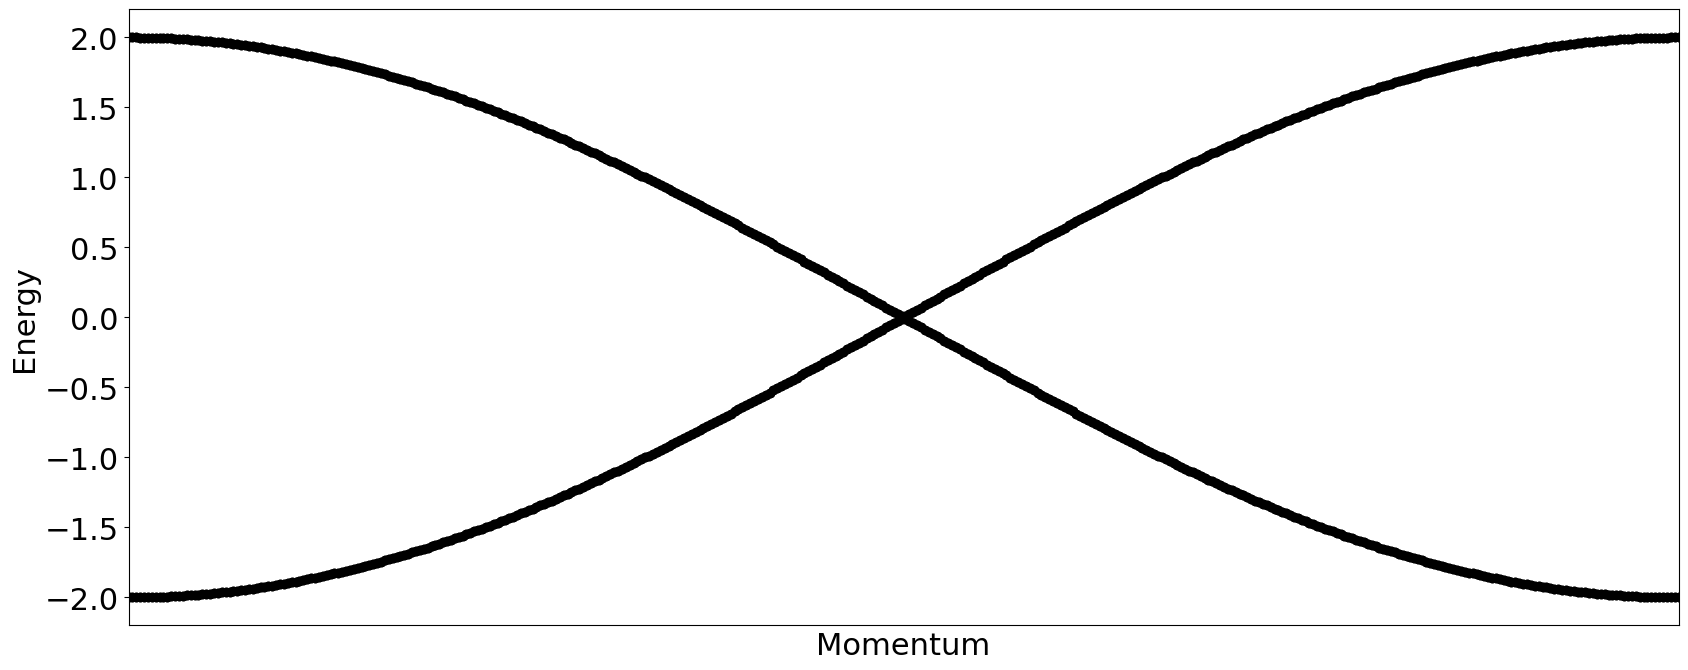

In [2]:
from pyqula import geometry
g = geometry.chain() # generate a chain
NS = 2 # size of the supercell
g = g.get_supercell(NS) # make a supercell
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.xlim([min(k),max(k)]) # adjust plot
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Quiz
- Discuss why there are two bands in this chain
- Change the size of the supercell, how many bands do you have and why?

## (Exercise) Magnetic order driven by interactions in a chain

(-3.85, 3.85, -0.05500000000000001, 0.05500000000000001)

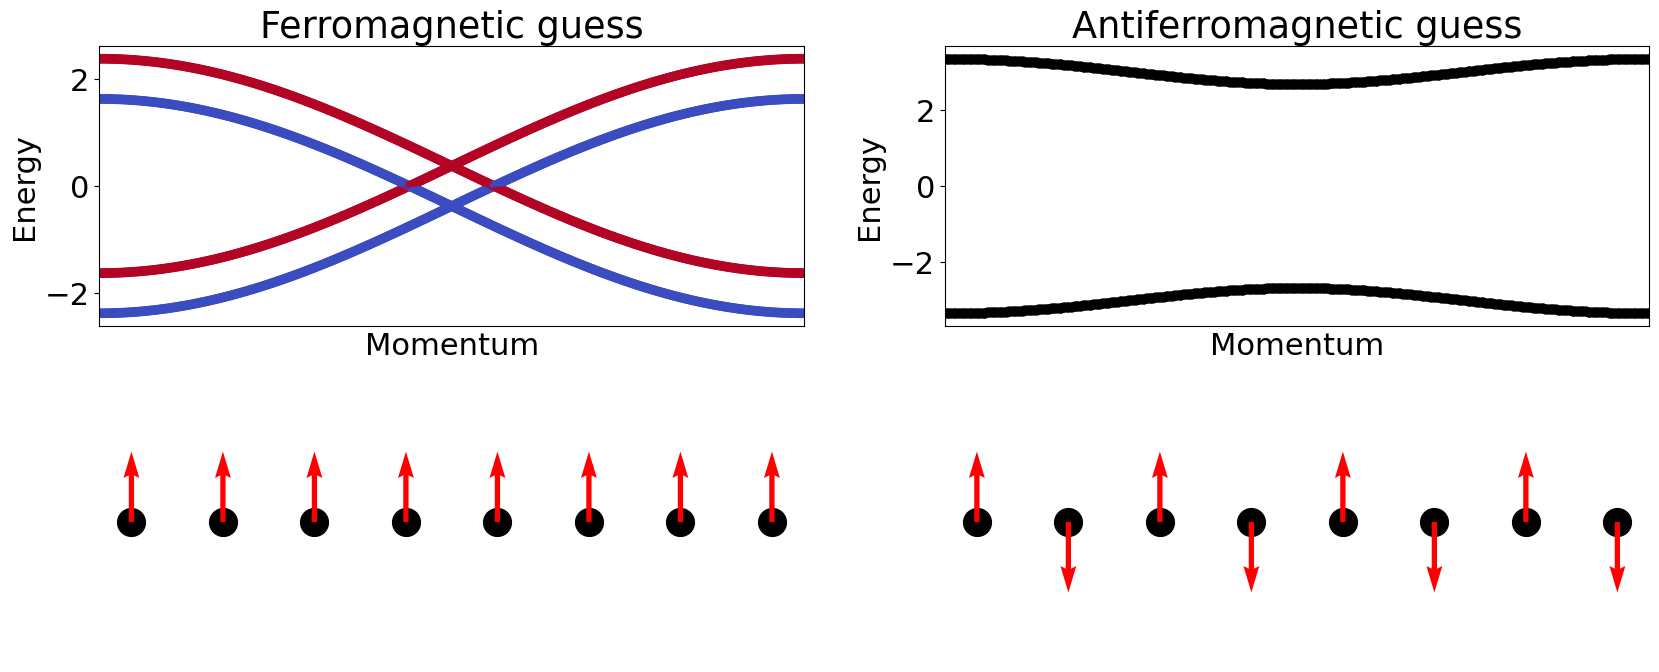

In [3]:
# let us now add interactions, and compute the electronic structure
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell (with internal sublattice)
h = g.get_hamiltonian() # generate the Hamiltonian

U = 6.0 # value of the local interaction

# first with a ferromagnetic guess
plt.subplot(2,2,1)
plt.title("Ferromagnetic guess")
hfe = h.get_mean_field_hamiltonian(U=U,mf="ferro") # solve the interacting problem with a mean-field guess
(k,e,c) = hfe.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.xlim([min(k),max(k)]) # plot

# plot magnetization
hs = hfe.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,3)
mz = hs.extract("mz") ; x = gs.r[:,0] ; y = gs.r[:,1] 
mz = mz/np.max(np.abs(mz)) # normalize
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,0.,mz,color="red",scale=10) ; plt.axis("off") # plot

# and with an antiferromagnetic guess
plt.subplot(2,2,2)
plt.title("Antiferromagnetic guess")
haf = h.get_mean_field_hamiltonian(U=U,mf="antiferro") # solve the interacting problem with a mean-field guess
(k,e) = haf.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.xlim([min(k),max(k)]) # plot

# plot magnetization
hs = haf.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,4)
mz = hs.extract("mz") ; x = gs.r[:,0] ; y = gs.r[:,1] 
mz = mz/np.max(np.abs(mz)) # normalize
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,0.,mz,color="red",scale=10) ; plt.axis("off") # plot

### Quiz
- Discuss which solution you think it has the lowest energy, and why
- Compute the selfconsistent solution for stronger values of the interaction. Which change do you observe?

## (Reminder) The spectra of a dimer
Here we will review the electronic spectra of a tight binding dimer

Text(0.5, 0, 'State index')

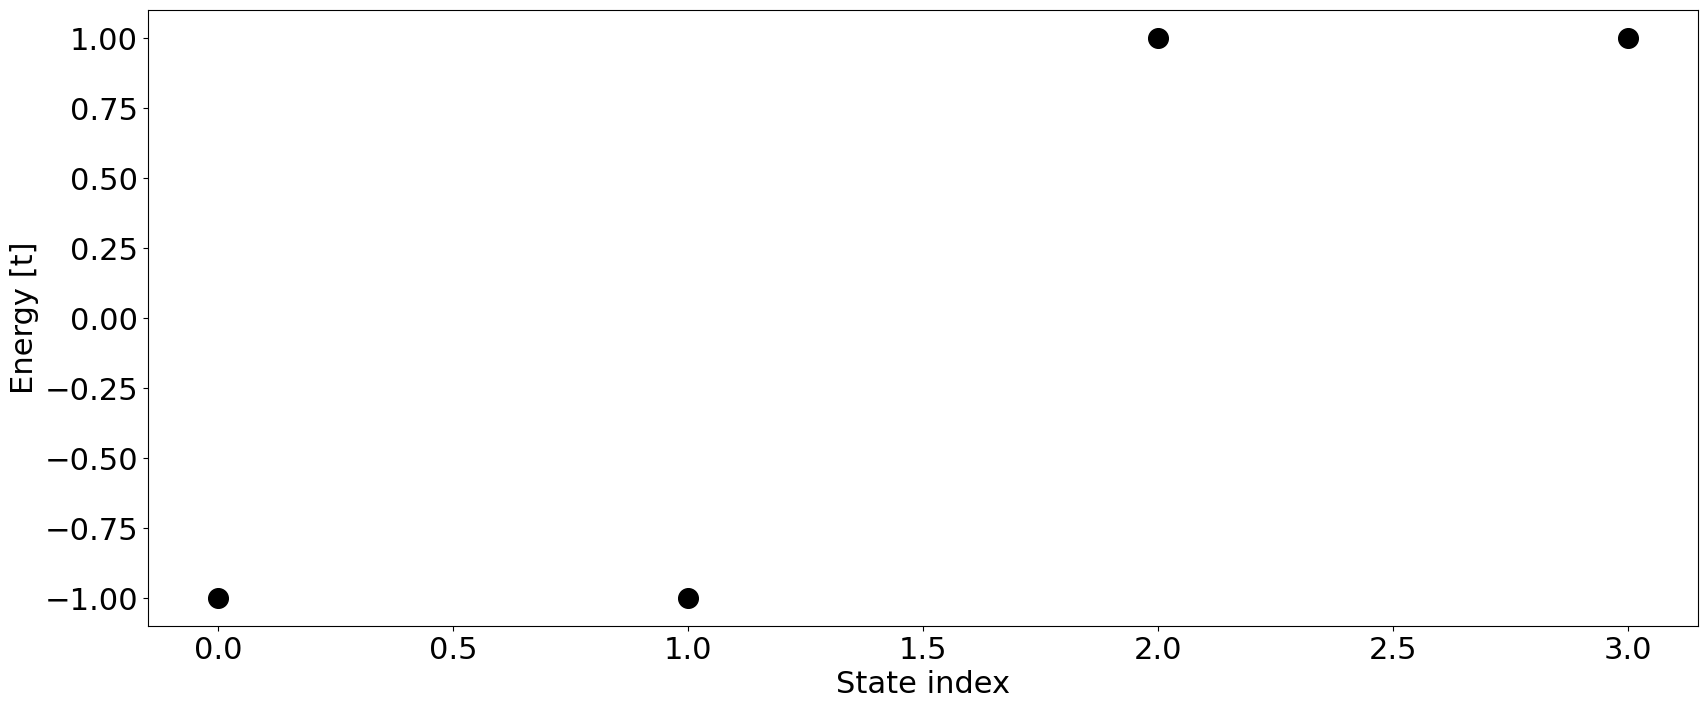

In [4]:
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell (with internal sublattice)
g.dimensionality = 0 # just retain the two sites per unit cell


h = g.get_hamiltonian(has_spin=True) # generate Hamiltonian

(ks,es) = h.get_bands() # get bands
plt.scatter(range(len(es)),es,c="black",s=200) ; plt.ylabel("Energy [t]") ; plt.xlabel("State index")

### Quiz
- There two sites in the system, why do we have four eigenstates?
- Why are the state degenerate in energy?

## (Exercise) The interacting dimer
Here we will see how the magnetization evolves in an interacting dimer chain

Text(0, 0.5, '$\\langle S_z \\rangle $')

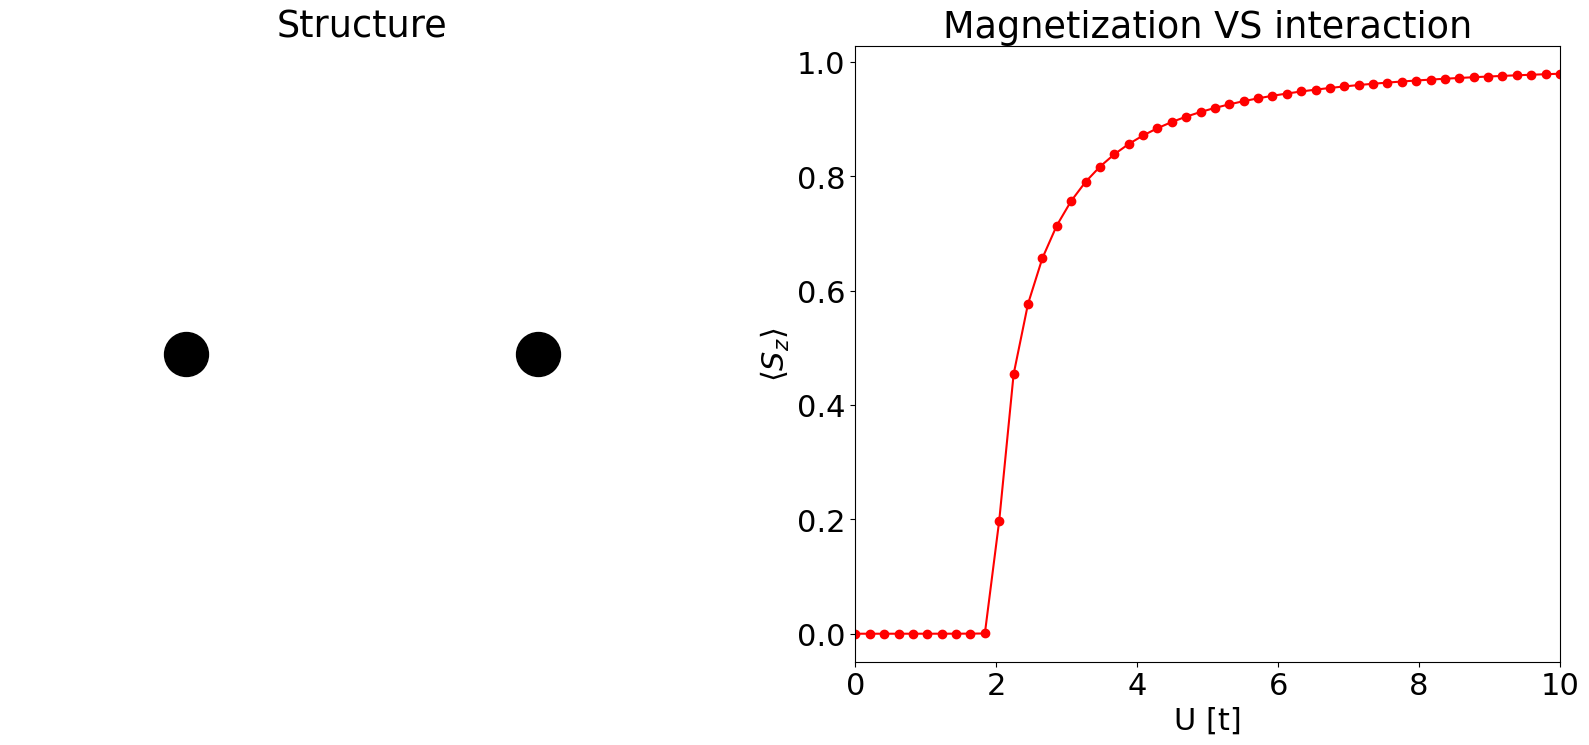

In [5]:
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell (with internal sublattice)
g.dimensionality = 0 # just retain the two sites per unit cell
h0 = g.get_hamiltonian() # generate the Hamiltonian

Us = np.linspace(0.,10.,50) # number of interactions
mzs = [] # empty list for magnetizations
for U in Us:
    h = h0.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # perform SCF
    mz = h.get_vev("mz")[1] # magnetization of the second site
    mzs.append(abs(mz)) # store magnetization in that size

    
plt.subplot(1,2,1) # plot the structure
plt.title("Structure")
plt.scatter(g.x,g.y,c="black",s=1000) ; plt.xlim([-1,1]) ; plt.axis("off")

plt.subplot(1,2,2) # plot the magnetization VS interaction
plt.title("Magnetization VS interaction")
plt.plot(Us,mzs,marker="o",c="red") ; plt.xlim([min(Us),max(Us)])
plt.xlabel("U [t]") ; plt.ylabel("$\\langle S_z \\rangle $")


### Quiz
- Identify the non-interacting limit in the plot
- Identify the strongly interacting limit in the plot
- Why does the magnetization saturate at large interactions?
- Why is there a critical value to have magnetization?

## (Exercise) The strongly interacting limit
Let us now compare the energies of a ferromagnetic and antiferromagnetic state in the strong coupling limit

Text(0, 0.5, 'Energy FE - AF [t]')

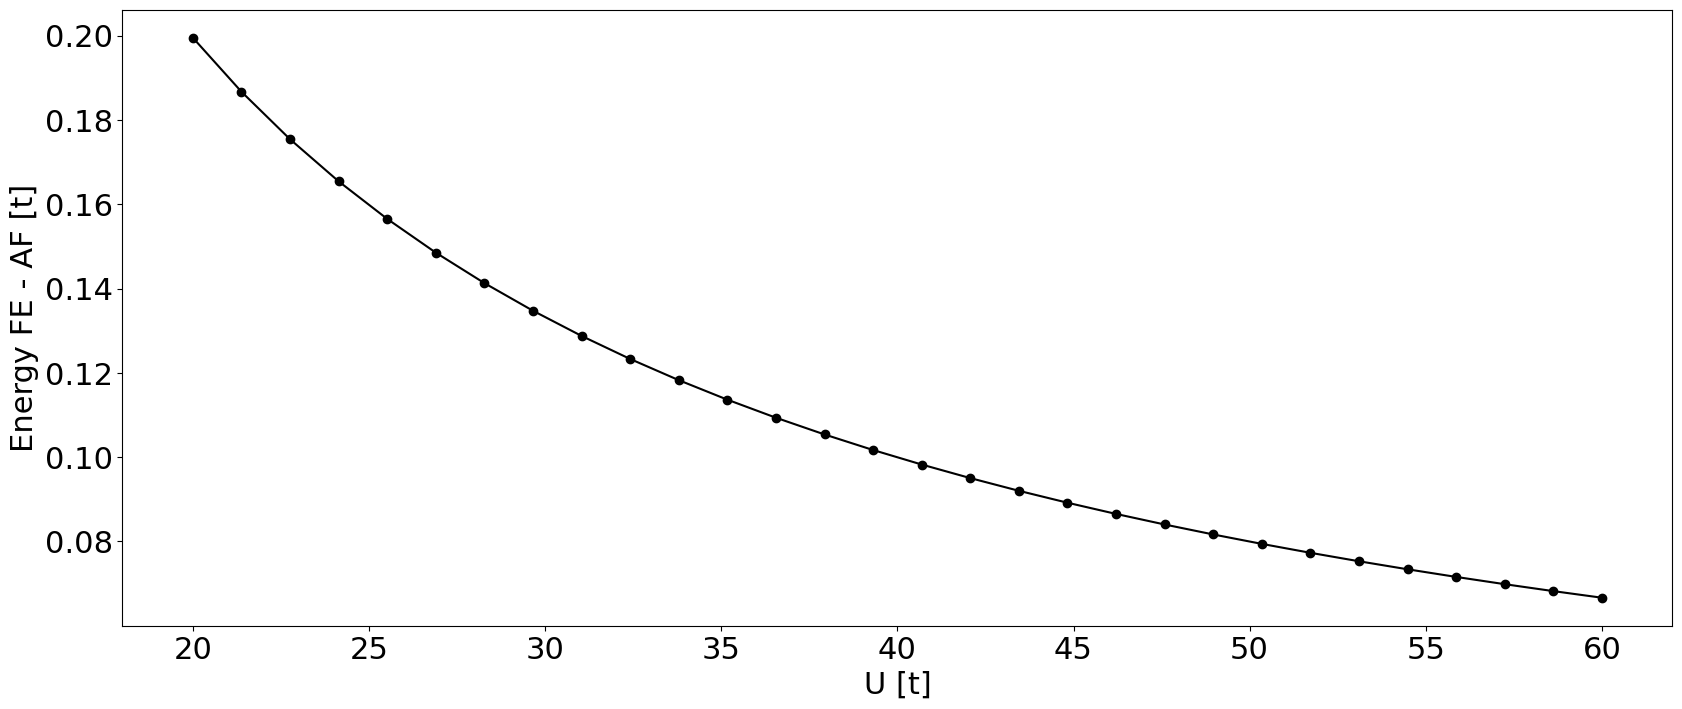

In [6]:
# let us now compute the energy difference as a function of U
from pyqula import geometry
def get_energy_difference(U):
    g = geometry.bichain() # generate a chain with two sites per unit cell
    h = g.get_hamiltonian() # generate the Hamiltonian
    (hfe,efe) = h.get_mean_field_hamiltonian(U=U,return_total_energy=True,mf="ferro",mix=0.9) # FE
    (haf,eaf) = h.get_mean_field_hamiltonian(U=U,return_total_energy=True,mf="antiferro",mix=0.9) # AF
    return efe - eaf

Us = np.linspace(20.,60,30) # values of U considered

Et = [get_energy_difference(U) for U in Us] # energy differences

plt.plot(Us,Et,c="black",marker="o") # plot total energy VS value of U
plt.xlabel("U [t]") ; plt.ylabel("Energy FE - AF [t]")

### Quiz
- Which state has the lowest energy?
- Discuss why the dependence of 1/U is observed in the energy differences between FE and AF configurations
- Compute this very same curve but going to lower values of U. Why does the 1/U behavior break down?

## (Exercise) Intermediate coupling regime and Stoner instability
Let us now show how there is a critical value of the electronic interaction to develop time-reversal symmetry breaking

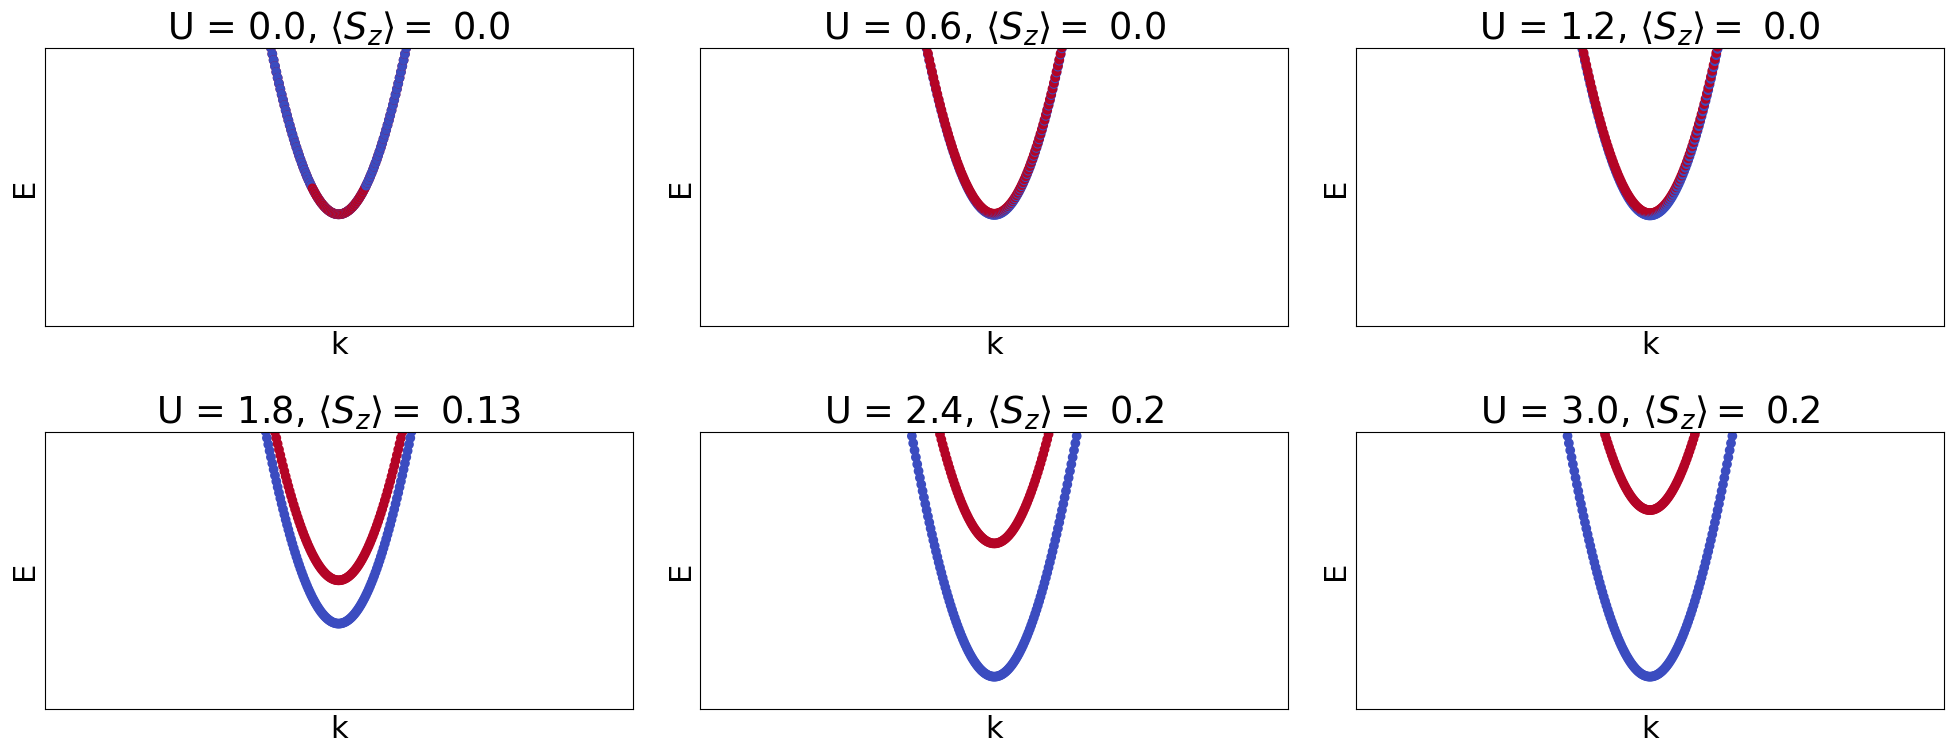

In [7]:
from pyqula import geometry
N = 6 # number of plots
Us = np.linspace(0.,3.0,N) # strengths of electronic interaction

ii = 1 # counter for the subplots
for U in Us:
    g = geometry.chain() # generate a chain
    h = g.get_hamiltonian() # generate the Hamiltonian
    h = h.get_mean_field_hamiltonian(U=U,filling=0.1,mf="ferro",mix=0.9,nk=300) # perform SCF
    plt.subplot(N//3,3,ii); ii += 1 
    (k,e,c) = h.get_bands(operator="sz") # compute band structure
    jz = np.mean(np.abs(h.get_vev("mz"))) # magnetization
    plt.title("U = "+str(np.round(U,2))+", $\\langle S_z \\rangle = $ "+str(np.round(jz,2))) # set the title
    plt.scatter(k,e,c=c) ; plt.yticks([]) ; plt.xticks([]) ; plt.ylim([-.5,.5]) ; plt.xlabel("k") ; plt.ylabel("E")
plt.tight_layout() # adjust the subplots

### Exercise
- Perform the calculation at a smaller filling (0.05 for example). Does the critical value increase or decrease?
- Perform the calculation at a bigger filling (0.2 for example). Does the critical value increase or decrease?
- Discuss why the critical value leading to magnetism changes

## (Exercise) Non-collinear magnetism from competing interactions
Let us now include further neighbor hoppings, which promotes competing magnetic interactions

(-10.45, 10.45, -0.05500000000000001, 0.05500000000000001)

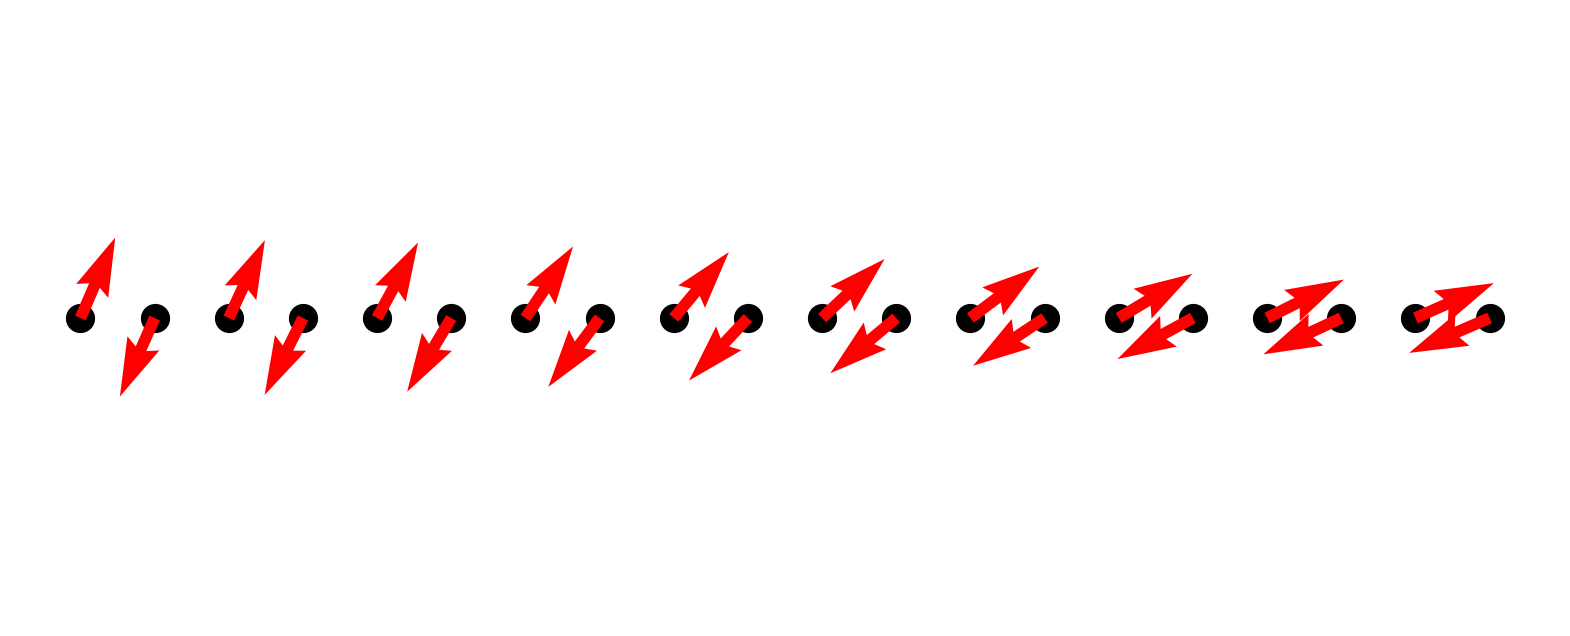

In [9]:
from pyqula import geometry
g = geometry.chain() # generate a chain 
g = g.get_supercell(20) ; g.dimensionality = 0 # use open boundaries, to avoid incommensurability issues
h = g.get_hamiltonian(tij=[1.,.3]) # generate the Hamiltonian

# generate the selfconsistent (SCF) Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="XY",mix=0.9) # solve the interacting problem with a mean-field guess
mx = h.extract("mx") ; my = h.extract("my") ; x = h.geometry.r[:,0] ; y = h.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red") ; plt.axis("off") # plot magnetization

### Exercise
- Discuss why including second neighbor hopping gives rise to a non-collinear magnetic state
- Is there a long neighbor hopping that can be included that does not lead to non-collinearity? Include it and show that you recover the antiferromagnetic state

#### In the lab
- Non-collinear magnetism coming from copeting interactions is observed in 2D materials, and in particular in the multiferroic monolayer NiI2
https://www.nature.com/articles/s41586-021-04337-x

## (Exercise) Non-collinear magnetism from spin-orbit coupling
We will now see that spin-orbit coupling is also able to generate a non-collinear magnetic texture

(-4.95, 4.95, -0.05500000000000001, 0.05500000000000001)

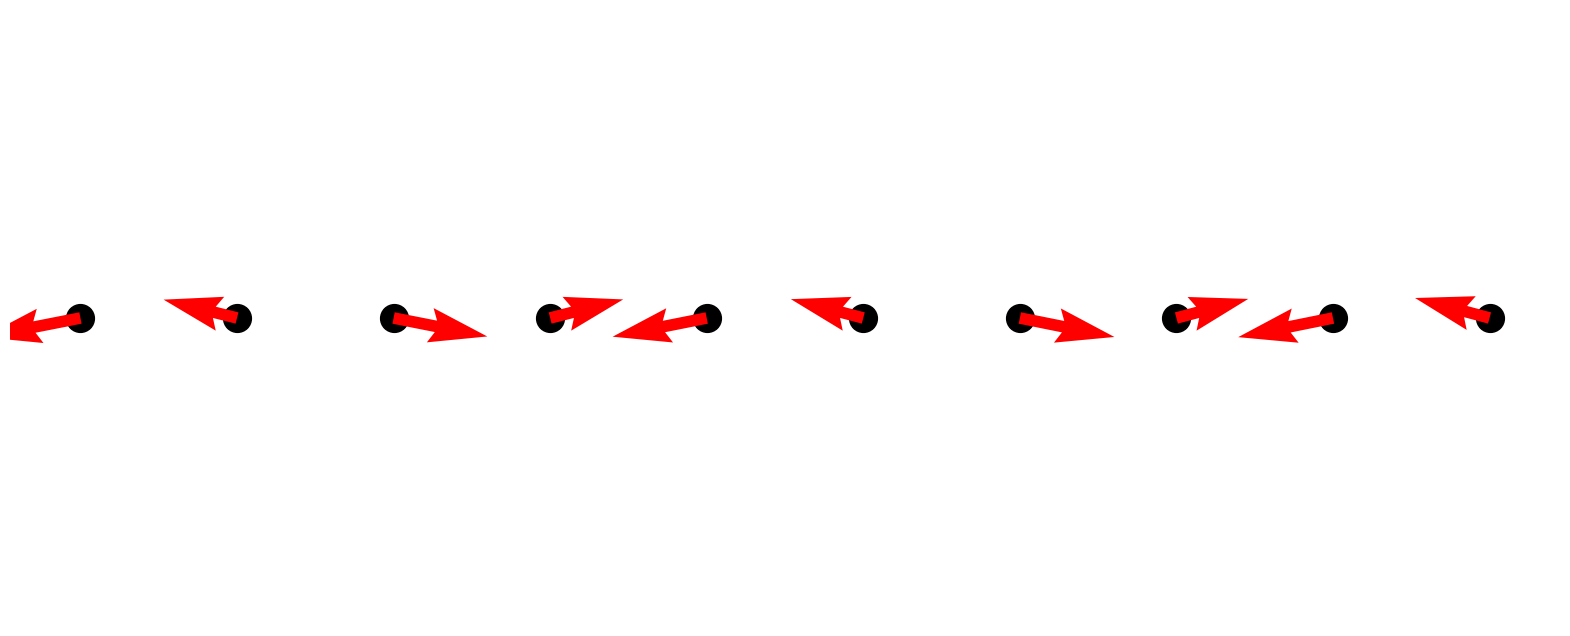

In [10]:
from pyqula import geometry
g = geometry.chain() # generate a chain 
g = g.get_supercell(10) ; g.dimensionality = 0 # use open boundaries, to avoid incommensurability issues
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_rashba(1.) # add Rashba spin-orbit coupling

# generate the SCF Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="random",mix=0.9) # solve the interacting problem with a mean-field guess
mx = h.extract("mx") ; my = h.extract("my") ; x = h.geometry.r[:,0] ; y = h.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red") ; plt.axis("off") # plot magnetization

### Quiz
- Discuss why spin-orbit coupling gives rise to non-collinear magnetism
- What is the term in the spin Hamiltonian that Rashba SOC generates?
- What happens to the spin texture if the sign of the Rashba term is reversed? (Physically, it means flipping the sample upside down)

## (Exercise) Magnetic instabilities of the square lattice
Let us now address the magnetic instabilities of the square lattice

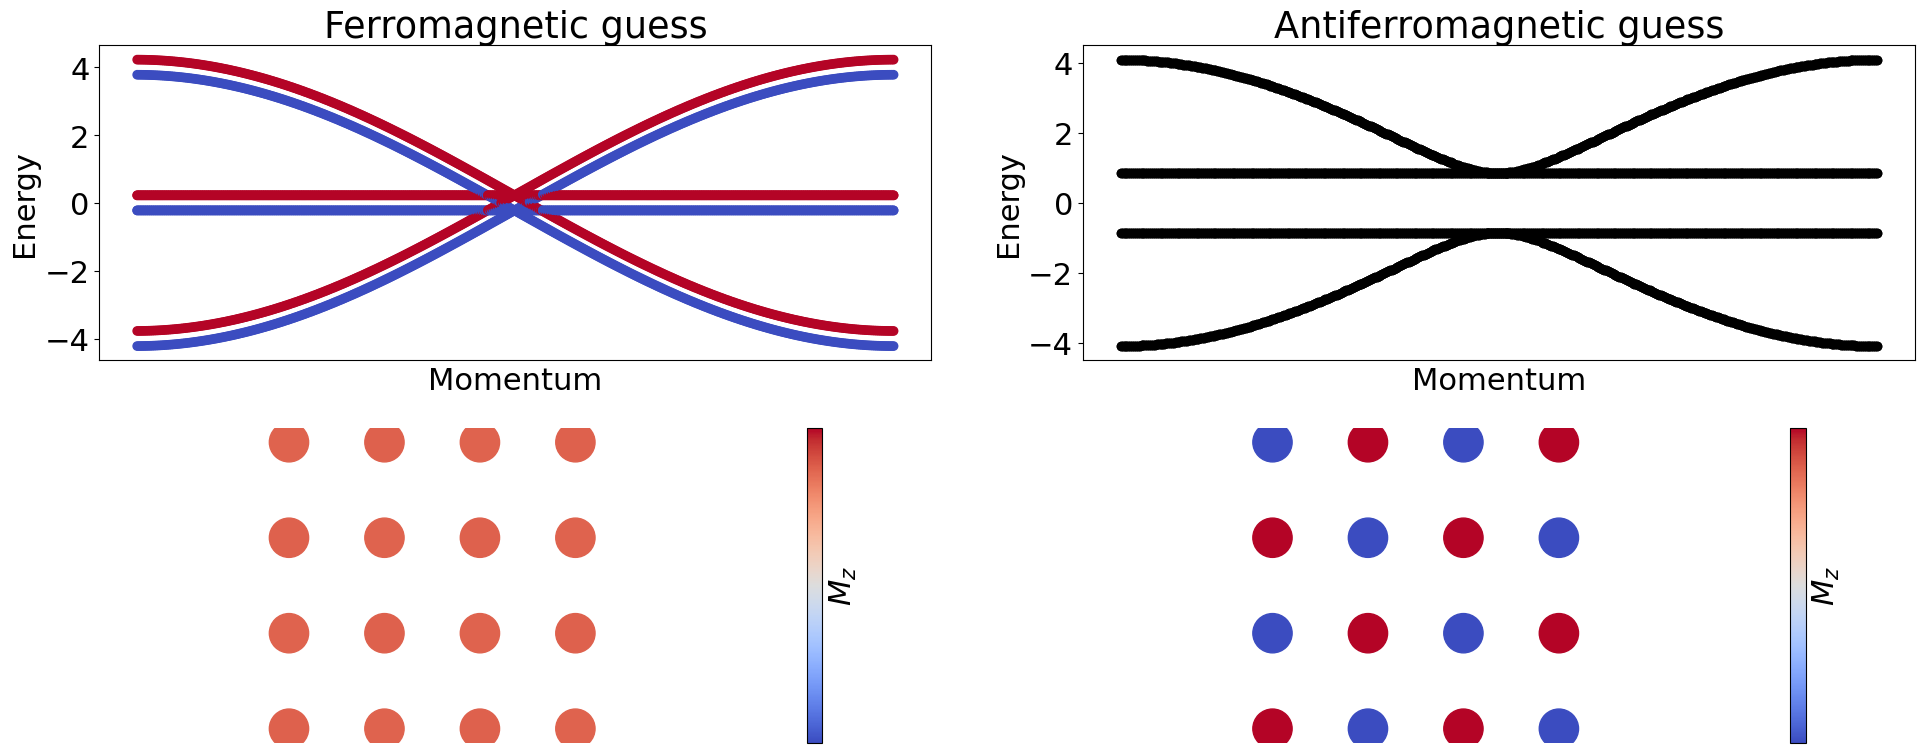

In [11]:
from pyqula import geometry
g = geometry.square_lattice_bipartite() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

# let us now add interactions, and compute the electronic structure
U = 3.0 # value of the local interaction

# first with a ferromagnetic guess
plt.subplot(2,2,1)
plt.title("Ferromagnetic guess")

hfe = h.get_mean_field_hamiltonian(U=U,mf="ferro",mix=0.9) # FE guess
(k,e,c) = hfe.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot z-component of the magnetization
hs = hfe.get_supercell(2) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,3)
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.3,vmax=.3,s=800) ; plt.yticks([]) ; plt.xticks([])
plt.axis("equal") ; plt.axis("off")
plt.colorbar(label="$M_z$",ticks=[])

# and with an antiferromagnetic guess
plt.subplot(2,2,2)
plt.title("Antiferromagnetic guess")
haf = h.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # AF guess
(k,e) = haf.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot z-component of the magnetization
hs = haf.get_supercell(2) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,4)
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.3,vmax=.3,s=800) ; plt.yticks([]) ; plt.xticks([]) 
plt.axis("equal") ; plt.axis("off")
plt.colorbar(label="$M_z$",ticks=[])

plt.tight_layout()

## (Exercise) Non-collinear magnetic order from geometric frustration
We will now address 2D models that show non-collinear magnetism due to the geometric frustration of the lattice.

(-4.124999999999999, 4.124999999999999, -2.3815698604072066, 2.381569860407206)

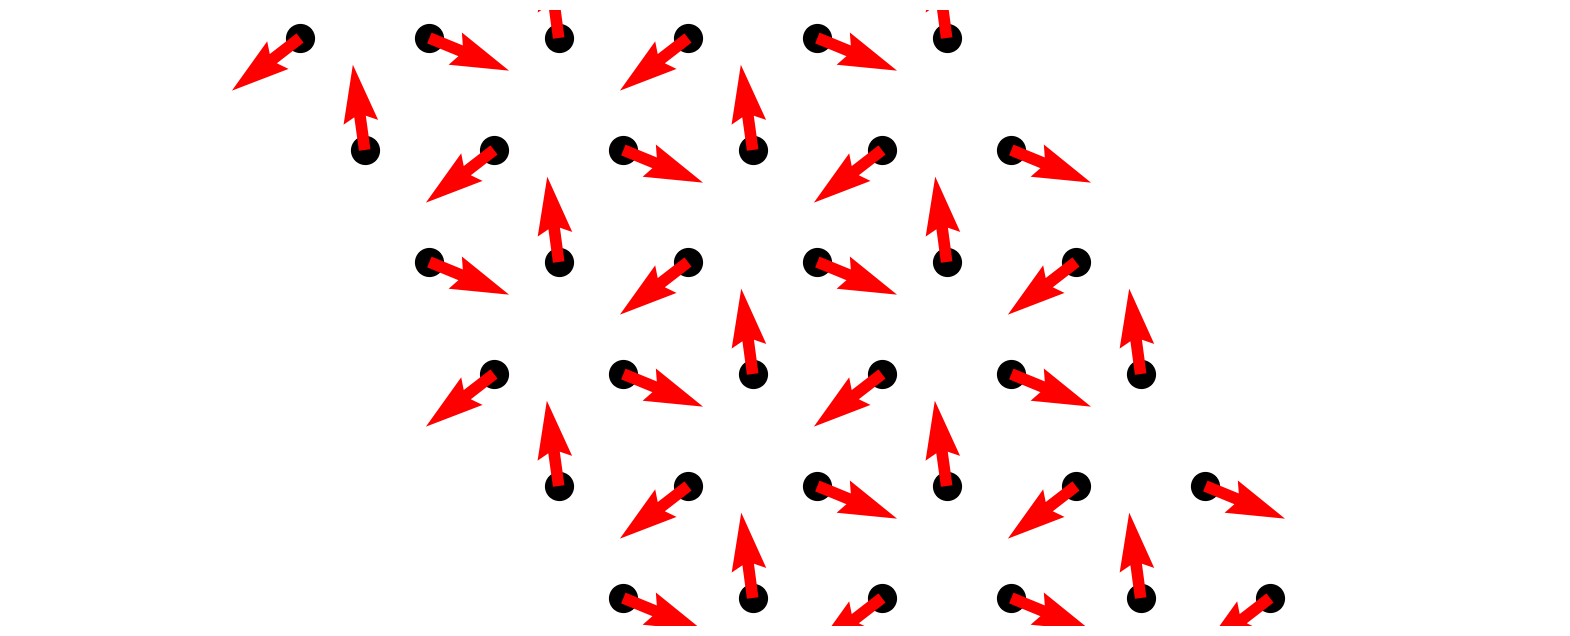

In [12]:
from pyqula import geometry
g = geometry.triangular_lattice() # generate a chain 
g = g.get_supercell((3,3)) # make a supercell
h = g.get_hamiltonian() # generate the Hamiltonian

# generate the SCF Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="XY",mix=0.9) # solve the interacting problem with a mean-field guess
hs = h.get_supercell(2) # generate a supercell
mx = hs.extract("mx") ; my = hs.extract("my") ; x = hs.geometry.r[:,0] ; y = hs.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red")  # plot magnetization
plt.axis("equal") ; plt.axis("off")

### Quiz
- Plot the band structure for the SCF solution for the 3x3 supercell, and estimate its gap
- Plot the band structure for the SCF solution for the 1x1 supercell, and estimate its gap
- Can you infer which one is the lowest energy solution, and why?

## Finite size effects
We will here see how in finite size systems the single particle electronic spectra features a gap